In [1]:
import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
network_analytics = pd.read_csv('./data/Network_Analytics.csv')

In [3]:
print(network_analytics['Timestamp'].max())
print(network_analytics['Timestamp'].min())
print(network_analytics['Timestamp'][0])
print(network_analytics['Timestamp'][1])
print(datetime.datetime.strptime(network_analytics['Timestamp'][1], '%d/%m/%Y %H:%M') - datetime.datetime.strptime(network_analytics['Timestamp'][0], '%d/%m/%Y %H:%M'))
print(datetime.datetime.strptime(network_analytics['Timestamp'][len(network_analytics) - 1], '%d/%m/%Y %H:%M') - datetime.datetime.strptime(network_analytics['Timestamp'][0], '%d/%m/%Y %H:%M'))

12/9/2017 9:57
1/1/2018 0:02
10/10/2017 7:01
10/10/2017 7:21
0:20:00
295 days, 6:06:00


In [5]:
network_analytics.describe()

,OutboundUtilzation (%)
count,25631.000000
mean,60.372335
std,22.517275
min,0.000048
25%,44.873850
50%,62.100200
75%,77.702150
max,99.995500


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


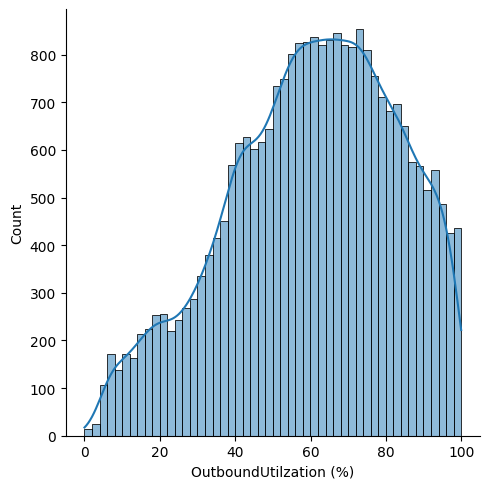

In [18]:
import seaborn as sns
sns.displot(network_analytics['OutboundUtilzation (%)'], kde=True, bins=50)

In [6]:
network_analytics['Timestamp']=pd.to_datetime(network_analytics['Timestamp'])
network_analytics = network_analytics.set_index('Timestamp')
network_analytics.rename(columns={'OutboundUtilzation (%)':'traffic_out'},inplace=True)  

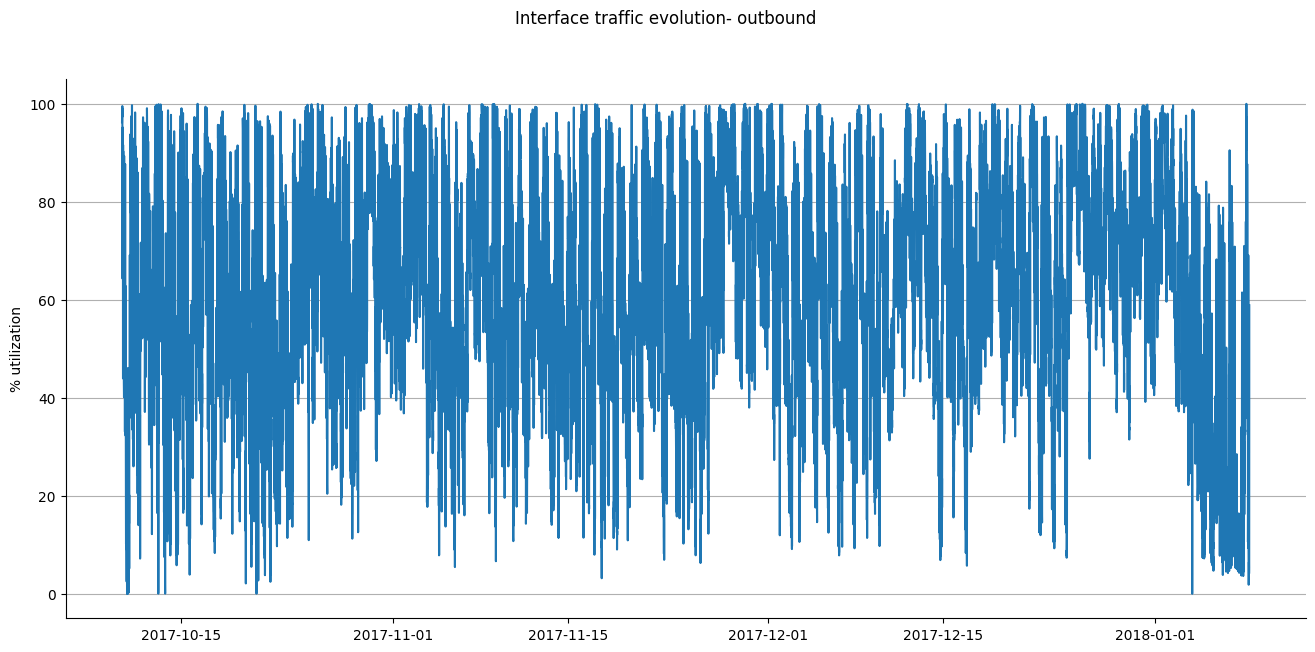

In [21]:
x = network_analytics.index
y = network_analytics['traffic_out']

fig, ax = plt.subplots(figsize=(16, 7))

ax.plot(x, y)

fig.suptitle('Interface traffic evolution- outbound')
ax.set_ylabel('% utilization')

ax.grid(True, axis='y')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [22]:
network_analytics_1H = network_analytics.resample('1H').mean()
network_analytics_1H.head()

,traffic_out
Timestamp,
2017-10-10 07:00:00,90.397000
2017-10-10 08:00:00,74.493000
2017-10-10 09:00:00,68.930125
2017-10-10 10:00:00,52.874208
2017-10-10 11:00:00,58.498275


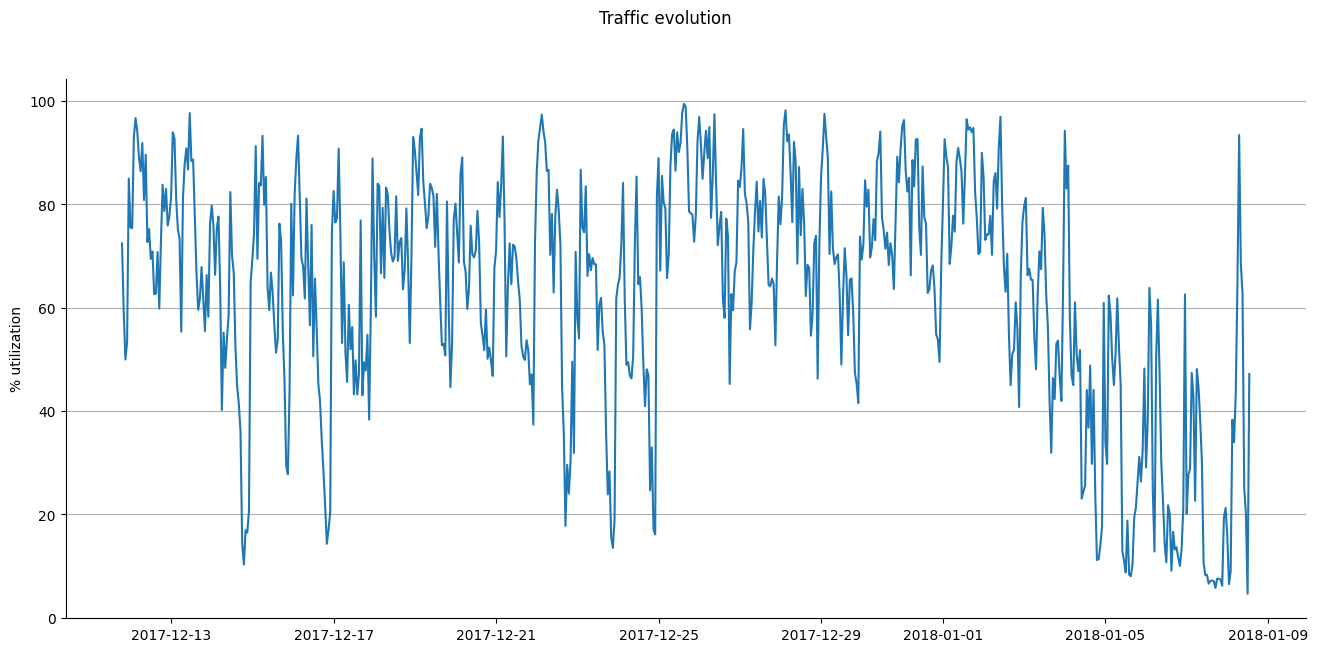

In [23]:
x = network_analytics_1H.index[1500:]
y = network_analytics_1H[1500:]

fig, ax = plt.subplots(figsize=(16, 7))

ax.plot(x, y)

fig.suptitle('Traffic evolution')
ax.set_ylabel('% utilization')

ax.grid(True, axis='y')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [25]:
from prophet import Prophet

traffic_1H = network_analytics_1H.reset_index()
df_traffic= traffic_1H.rename(columns={'Timestamp': 'ds', 'traffic_out': 'y'})
model = Prophet()
model.fit(df_traffic)

13:26:51 - cmdstanpy - INFO - Chain [1] start processing
13:26:51 - cmdstanpy - INFO - Chain [1] done processing


In [26]:
future = model.make_future_dataframe(periods=20)

In [27]:
forecast = model.predict(future)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


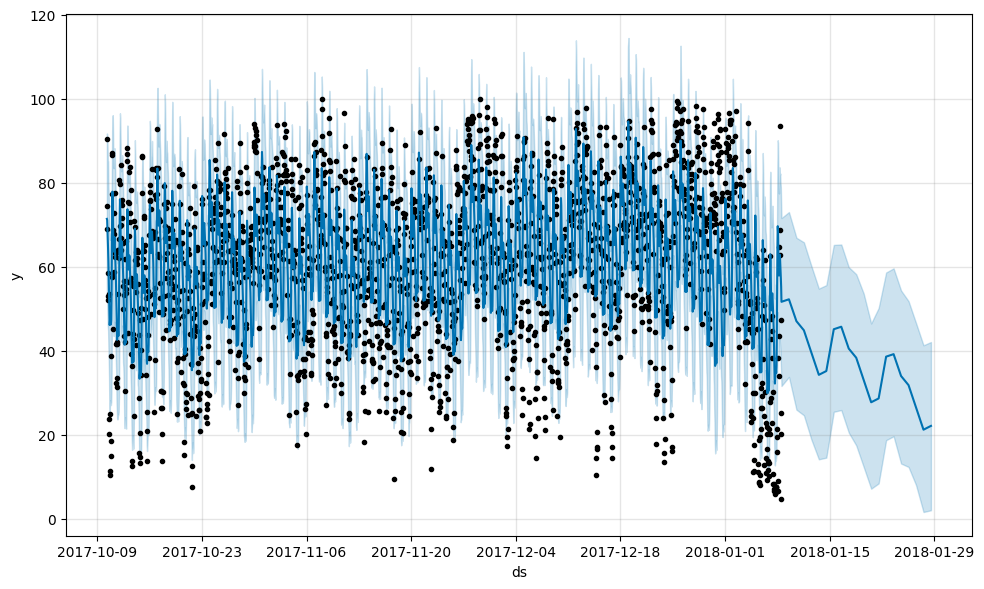

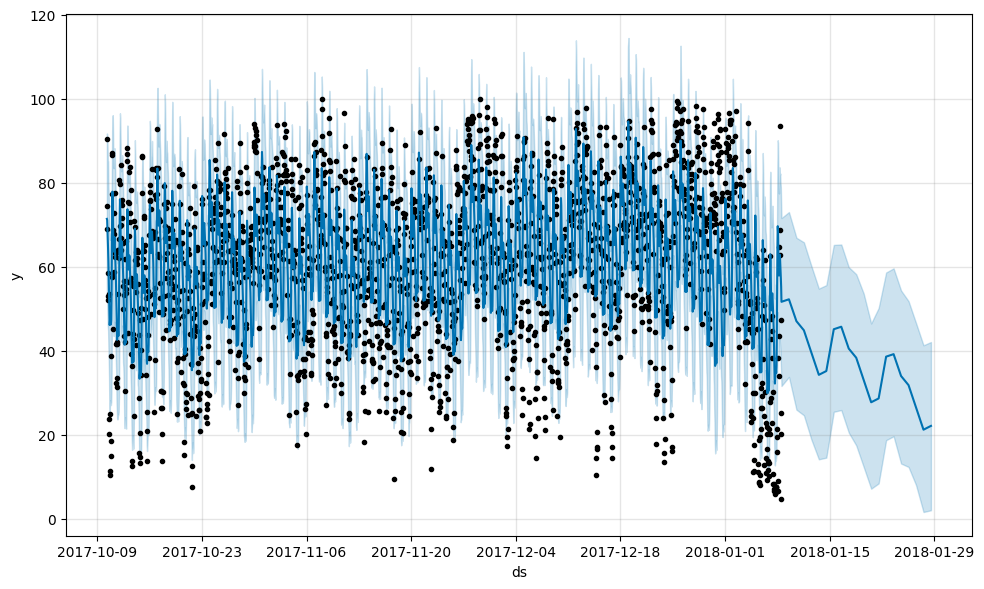

In [28]:
model.plot(forecast)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/prophet/plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/prophet/plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version thi

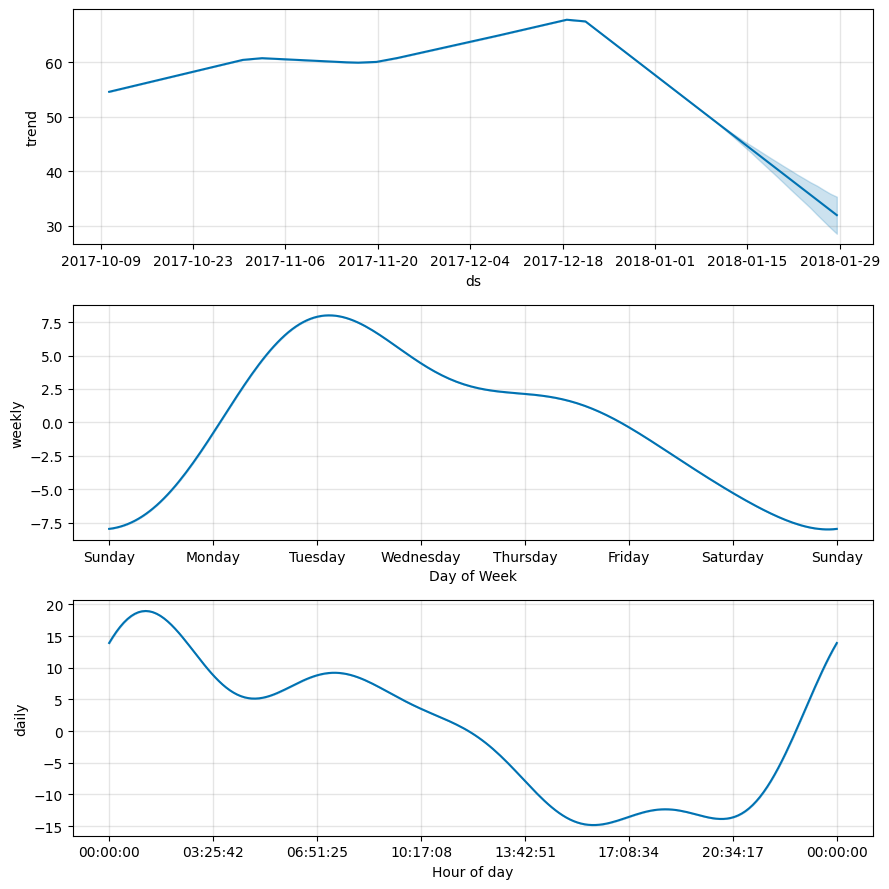

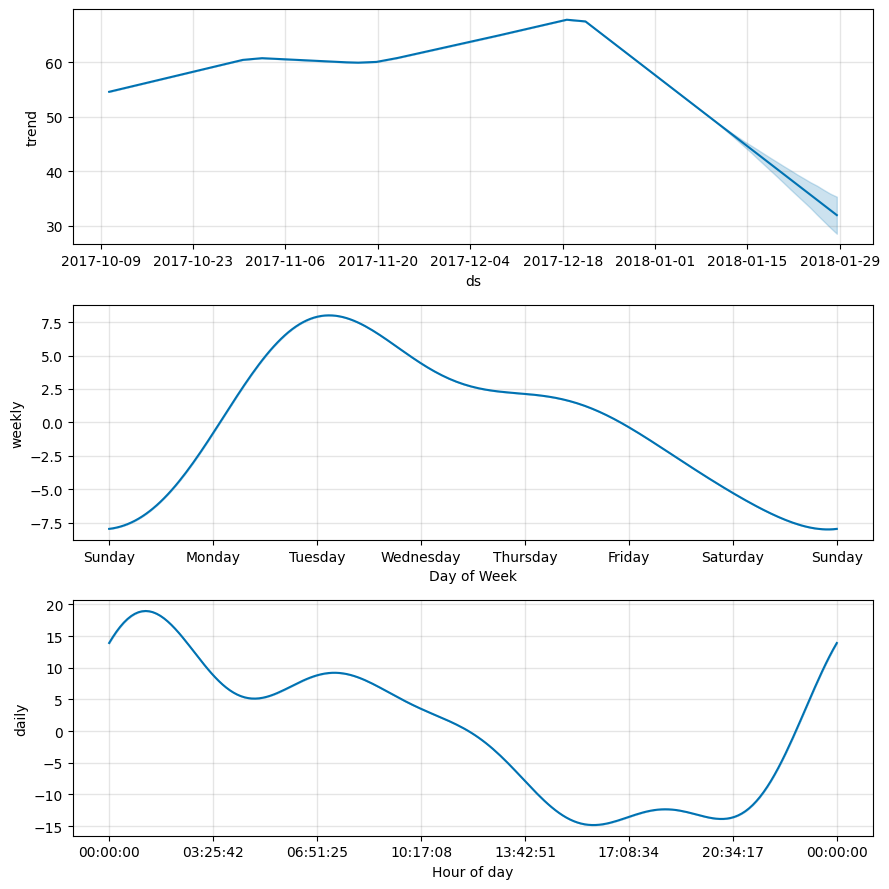

In [29]:
model.plot_components(forecast, weekly_start = 1)

In [30]:
special_days = pd.DataFrame({
  'holiday': 'new_year',
  'ds': pd.to_datetime(['2017-12-31']),
  'lower_window': 0,
  'upper_window': 10,
})

13:27:54 - cmdstanpy - INFO - Chain [1] start processing
13:27:54 - cmdstanpy - INFO - Chain [1] done processing
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


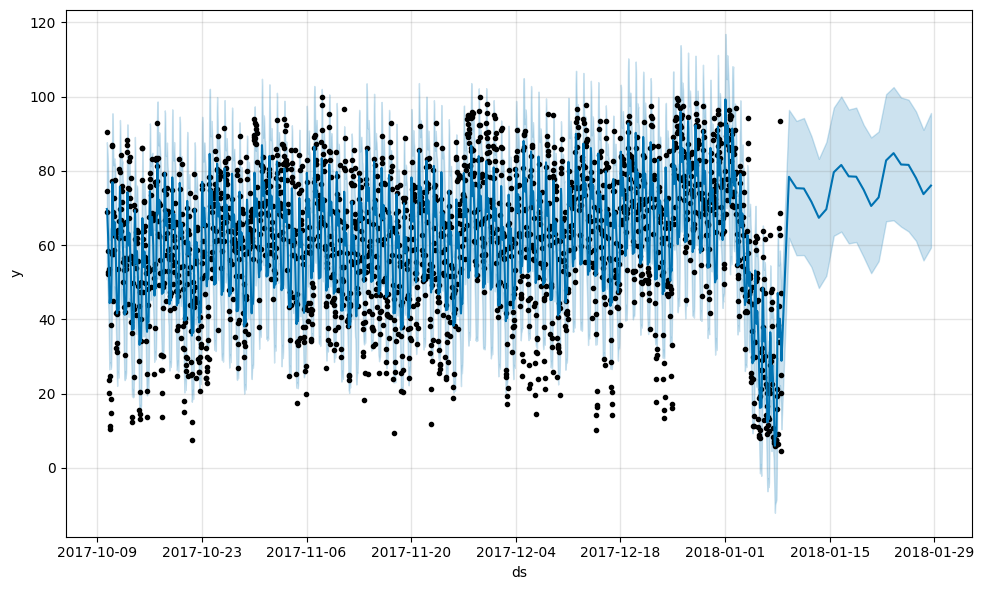

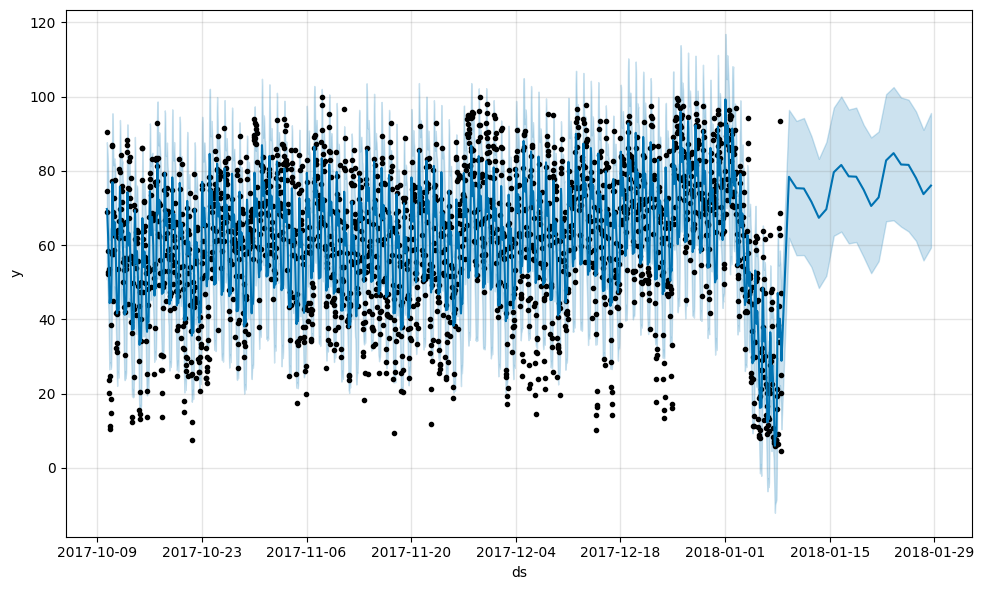

In [31]:
special_days = special_days.reset_index()
model2 = Prophet(holidays=special_days)
forecast2 = model2.fit(df_traffic).predict(future)
model2.plot(forecast2)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/prophet/plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/prophet/plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version thi

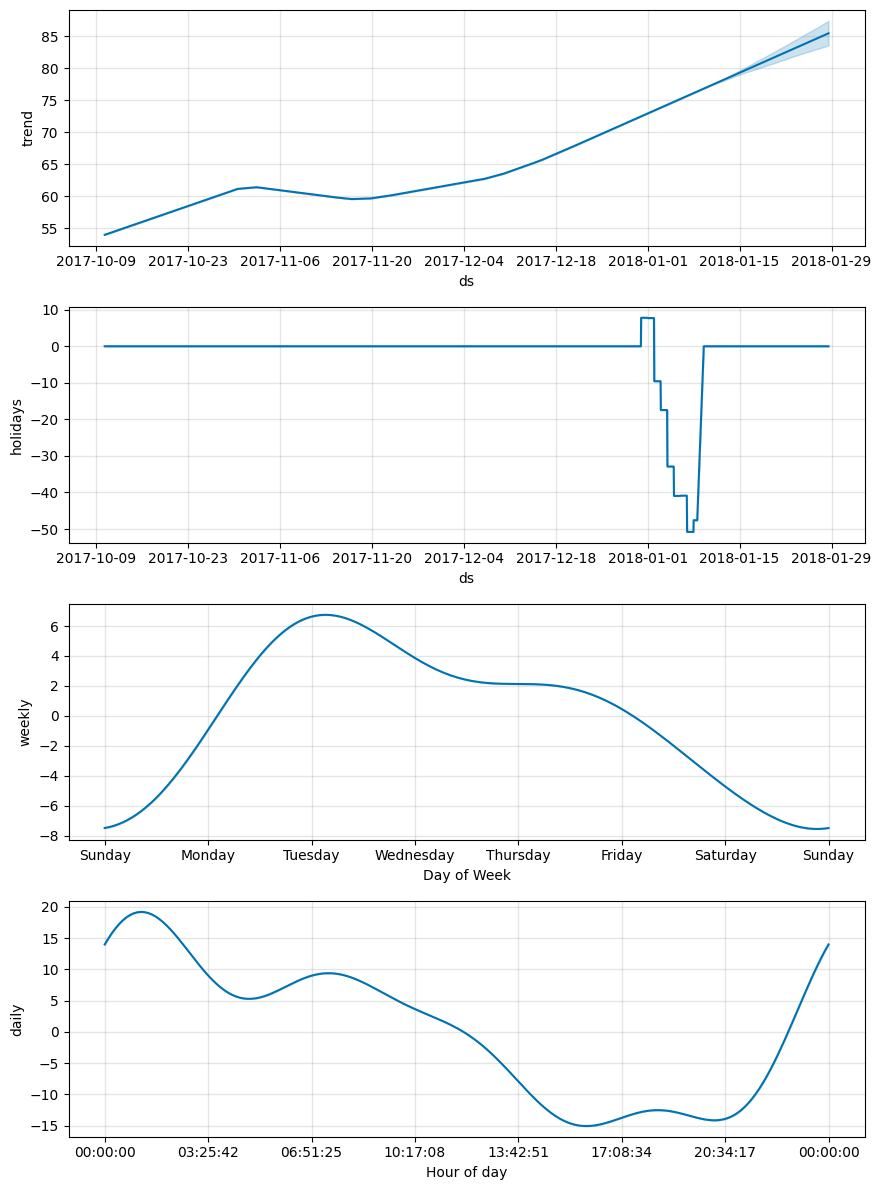

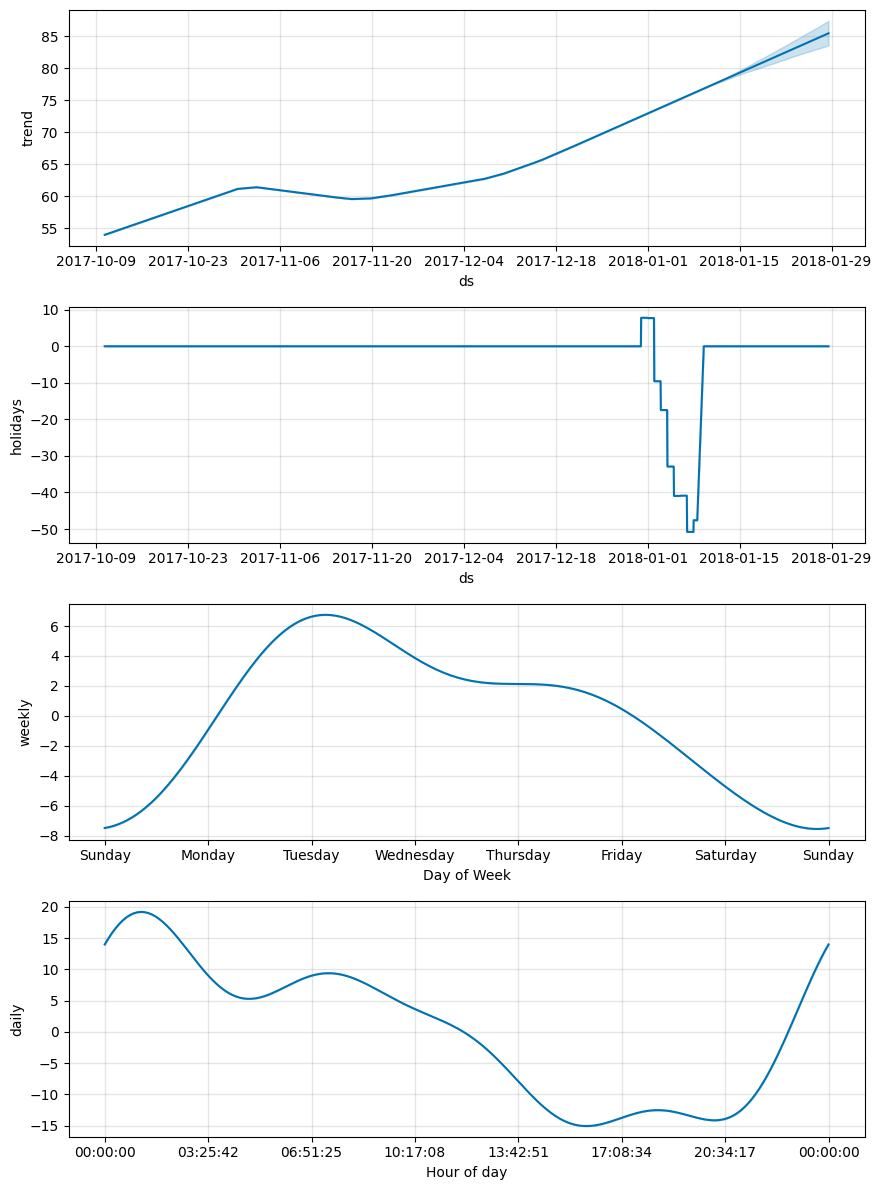

In [32]:
model2.plot_components(forecast2, weekly_start=1)